In [2]:
import requests
import pandas as pd
from geopy.distance import geodesic
import networkx as nx
import os
import json
from dotenv import load_dotenv

In [66]:
# Carregar variáveis do arquivo .env
load_dotenv('/Users/enzooliveira/Pessoal/VS CODE/RoutesWithA*/.env')

# Acessar as variáveis
API_KEY = os.getenv('API_KEY')
BASE_URL = os.getenv('BASE_URL')


# Parâmetros da requisição
params = {
    "output": "json",
    "countrycode": "BR",  # Alterar conforme necessário
    "maxresults": 1000,  # Número de resultados
    "compact": True,  # Retorno compacto
    "verbose": False,
    "key": API_KEY
}

# Enviando a requisição
response = requests.get(BASE_URL, params=params)

# Processando a resposta
if response.status_code == 200:
    charging_points = response.json()
    print("Número de pontos encontrados:", len(charging_points))

    # Criar uma lista para armazenar os dados de cada ponto de carregamento
    data = []
    for point in charging_points:
        # Extrair as informações
        name = point.get('AddressInfo', {}).get('Title', 'Desconhecido')
        latitude = point.get('AddressInfo', {}).get('Latitude')
        longitude = point.get('AddressInfo', {}).get('Longitude')
        
        # Inicializar o maior PowerKW como 0
        max_power_kw = 0
        
        # Extrair os conectores (se existirem) e pegar o maior PowerKW
        connectors = point.get('Connections', [])
        for connector in connectors:
            max_power_kw = max(max_power_kw, connector.get('PowerKW', 0))  # Pega o maior PowerKW
        
        # Adicionar os dados à lista
        data.append({
            'Nome': name,
            'Localização': f"{latitude}, {longitude}",
            'PowerKW': max_power_kw
        })

    # Criar um DataFrame com os dados
    df = pd.DataFrame(data)

    # Exibir o DataFrame
    print(df)
else:
    print(f"Erro ao acessar API: {response.status_code}")

Número de pontos encontrados: 417
                                         Nome  \
0    Creluz Eletroposto Boa Vista das Missões   
1                     Creluz Charging Station   
2                  On-Charge Charging Station   
3                                      Unijui   
4       TEM CARREGADORES - LANCHONETE O SALES   
..                                        ...   
412                                  BR Mania   
413         Av. Epitácio Pessoa, 2900 - Lagoa   
414         Av. Epitácio Pessoa, 2900 - Lagoa   
415                        Recife, Pernambuco   
416          Petrobras Future Station Service   

                                  Localização  PowerKW  
0    -27.687790618985048, -53.306760974212835     40.0  
1     -27.92234923835155, -53.314338346915456     40.0  
2     -30.240208269278046, -54.96965087435075     38.0  
3     -28.38835640682798, -53.929912641540184     60.0  
4      -5.892237723663399, -42.64569020132754     30.0  
..                                 

In [67]:
df

,Nome,Localização,PowerKW
0,Creluz Eletroposto Boa Vista das Missões,"-27.687790618985048, -53.306760974212835",40.0
1,Creluz Charging Station,"-27.92234923835155, -53.314338346915456",40.0
2,On-Charge Charging Station,"-30.240208269278046, -54.96965087435075",38.0
3,Unijui,"-28.38835640682798, -53.929912641540184",60.0
4,TEM CARREGADORES - LANCHONETE O SALES,"-5.892237723663399, -42.64569020132754",30.0
...,...,...,...
412,BR Mania,"-22.97294, -43.20274",50.0
413,"Av. Epitácio Pessoa, 2900 - Lagoa","-22.97294, -43.20274",0.0
414,"Av. Epitácio Pessoa, 2900 - Lagoa","-22.97294, -43.20274",0.0
415,"Recife, Pernambuco","-14.235004, -51.92527999999999",0.0


In [68]:
#Filtrar linhas onde 'PowerKW' é igual a 0
filtered_df = df[df['PowerKW'] == 0]

filtered_df

,Nome,Localização,PowerKW
29,Posto Luz da Lua - InWatts,"-25.46926759912884, -49.35278832712896",0.0
156,Rodovia Governador Leonel de Moura Brizola,"-29.692107611323813, -51.70509274127477",0.0
282,Byd Carmais,"-3.738428409647497, -38.50797373048607",0.0
295,BYD Itavema,"-23.006053601412404, -43.432111951119026",0.0
301,Rodoviária de João Neiva,"-19.755933400729162, -40.380491082223216",0.0
346,Fashion Outlet Novo Hamburgo,"-29.663541425765796, -51.14242583068132",0.0
362,Teresópolis Shopping,"-22.41143127179805, -42.965655579837176",0.0
384,Rua Maria de Freitas 639,"-21.120077, -44.170421",0.0
387,Plaza Shopping Niterói,"-22.88759, -43.124492",0.0
410,BR Mania,"-22.97294, -43.20274",0.0


In [69]:
# Remover as linhas onde 'PowerKW' é igual a 0 do DataFrame original
df = df[df['PowerKW'] != 0]

df

,Nome,Localização,PowerKW
0,Creluz Eletroposto Boa Vista das Missões,"-27.687790618985048, -53.306760974212835",40.0
1,Creluz Charging Station,"-27.92234923835155, -53.314338346915456",40.0
2,On-Charge Charging Station,"-30.240208269278046, -54.96965087435075",38.0
3,Unijui,"-28.38835640682798, -53.929912641540184",60.0
4,TEM CARREGADORES - LANCHONETE O SALES,"-5.892237723663399, -42.64569020132754",30.0
...,...,...,...
406,EDP | Graal Topázio (Plug&GO),"-22.614671702946467, -47.356908583240454",175.0
407,Estação Posto Ilhabela,"-27.578138960692, -48.510338084656",50.0
408,Floripa Shopping,"-27.534450652309026, -48.509559003948254",5.0
409,Posto BR Mania,"-22.97294, -43.20274",50.0


In [70]:
#Filtrar linhas onde 'PowerKW' é igual a 0
filtered_df = df[df['PowerKW'] == 0]

filtered_df

,Nome,Localização,PowerKW


In [ ]:
import os
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from geopy.distance import geodesic

def calcular_distancia_geodesica(lat1, lon1, lat2, lon2):
    """Calcula a distância geodésica em km (aprox) entre dois pontos (lat,lon)."""
    return round(geodesic((lat1, lon1), (lat2, lon2)).km, 1)

def calcular_tempo_deslocamento(distancia_km):
    """
    Considera uma velocidade média de:
      - 40 km/h para trechos <= 50 km (urbano),
      - 80 km/h para trechos > 50 km (rodoviário).
    Retorna tempo em minutos.
    """
    if distancia_km <= 50:
        velocidade_kmh = 40.0
    else:
        velocidade_kmh = 80.0
    tempo_min = (distancia_km / velocidade_kmh) * 60.0
    return round(tempo_min, 1)

def calcular_tempo_carregamento(distancia_km, power_kw):
    """
    Exemplo de função para estimar tempo de carregamento,
    assumindo reposição de energia proporcional à distância rodada.
    Retorna tempo em minutos.
    """
    tempo_min = (distancia_km / power_kw) * 60.0
    return round(tempo_min, 1)

def salvar_grafo_em_json(grafo, autonomia, pasta):
    """Salva o grafo em formato JSON (node-link) no diretório especificado."""
    if not os.path.exists(pasta):
        os.makedirs(pasta)
    nome_base = os.path.join(pasta, f'grafo_{autonomia}_km.json')
    from networkx.readwrite import json_graph
    with open(nome_base, 'w') as f:
        json.dump(json_graph.node_link_data(grafo), f)
    print(f"Grafo salvo em {nome_base}")

def construir_grafo(df, autonomia_km, pasta, ponto_inicial, ponto_final):
    """
    df  -> DataFrame com colunas ['Nome','Localização','PowerKW']
           onde 'Localização' = 'lat,lon'
    ponto_inicial, ponto_final -> tuplas (lat, lon)
    """
    G = nx.DiGraph()

    # Adicionar os nós (pontos de carregamento)
    for _, row in df.iterrows():
        nome_ponto = row['Nome']
        lat, lon = map(float, row['Localização'].split(','))
        G.add_node(nome_ponto, Lat=lat, Lon=lon, PowerKW=row['PowerKW'])

    # Criar arestas entre pontos de carregamento (somente se dist <= autonomia)
    for _, ponto1 in df.iterrows():
        for _, ponto2 in df.iterrows():
            if ponto1['Nome'] != ponto2['Nome']:
                lat1, lon1 = map(float, ponto1['Localização'].split(','))
                lat2, lon2 = map(float, ponto2['Localização'].split(','))
                dist = calcular_distancia_geodesica(lat1, lon1, lat2, lon2)
                if dist <= autonomia_km:
                    tempo_desloc = calcular_tempo_deslocamento(dist)
                    # Carrega no ponto de destino (ponto2)
                    power_kw = ponto2['PowerKW']
                    tempo_carreg = calcular_tempo_carregamento(dist, power_kw)

                    G.add_edge(ponto1['Nome'], ponto2['Nome'],
                               weight_distancia=dist,
                               weight_deslocamento=tempo_desloc,
                               weight_carregamento=tempo_carreg)

    # Nó 'inicial' e 'final'
    G.add_node('inicial', Lat=ponto_inicial[0], Lon=ponto_inicial[1], PowerKW=0)
    G.add_node('final',   Lat=ponto_final[0],   Lon=ponto_final[1],   PowerKW=0)

    # Arestas de 'inicial' -> pontos
    lat_ini, lon_ini = ponto_inicial
    for _, ponto in df.iterrows():
        lat2, lon2 = map(float, ponto['Localização'].split(','))
        dist = calcular_distancia_geodesica(lat_ini, lon_ini, lat2, lon2)
        if dist <= autonomia_km:
            tempo_desloc = calcular_tempo_deslocamento(dist)
            power_kw = ponto['PowerKW']
            tempo_carreg = calcular_tempo_carregamento(dist, power_kw)
            G.add_edge('inicial', ponto['Nome'],
                       weight_distancia=dist,
                       weight_deslocamento=tempo_desloc,
                       weight_carregamento=tempo_carreg)

    # Arestas de pontos -> 'final'
    lat_fin, lon_fin = ponto_final
    for _, ponto in df.iterrows():
        lat1, lon1 = map(float, ponto['Localização'].split(','))
        dist = calcular_distancia_geodesica(lat1, lon1, lat_fin, lon_fin)
        if dist <= autonomia_km:
            tempo_desloc = calcular_tempo_deslocamento(dist)
            G.add_edge(ponto['Nome'], 'final',
                       weight_distancia=dist,
                       weight_deslocamento=tempo_desloc,
                       weight_carregamento=0.0)

    # Aresta direta 'inicial' -> 'final' (se couber na autonomia)
    dist = calcular_distancia_geodesica(lat_ini, lon_ini, lat_fin, lon_fin)
    if dist <= autonomia_km:
        tempo_desloc = calcular_tempo_deslocamento(dist)
        G.add_edge('inicial', 'final',
                   weight_distancia=dist,
                   weight_deslocamento=tempo_desloc,
                   weight_carregamento=0.0)

    # Salvar o grafo
    salvar_grafo_em_json(G, autonomia_km, pasta)
    return G


# Ponto inicial e final
    sp_coords = (-23.5505, -46.6333)      # São Paulo
    floripa_coords = (-27.5954, -48.5480) # Florianópolis

# Construir e salvar grafo
autonomia_km = 400
pasta = f"{autonomia_km}km"

G = construir_grafo(df, autonomia_km, pasta, sp_coords, floripa_coords)
print(f"Grafo criado com {G.number_of_nodes()} nós e {G.number_of_edges()} arestas.")

Grafo salvo em 400km/grafo_400_km.json
Grafo criado com 399 nós e 23280 arestas.


/opt/anaconda3/envs/tf-metal/lib/python3.10/site-packages/networkx/readwrite/json_graph/node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


In [82]:
import os
import json
import networkx as nx

# Função para verificar se há um caminho entre o ponto inicial e o final
def verificar_conexao(grafo, ponto_inicial, ponto_final):
    """
    Verifica se há um caminho entre o ponto inicial e o ponto final no grafo.
    """
    return nx.has_path(grafo, ponto_inicial, ponto_final)

# Função para gerar o subgrafo contendo apenas o menor caminho (usando Dijkstra)
def gerar_subgrafo_menor_caminho(grafo, ponto_inicial, ponto_final):
    """
    Gera um subgrafo contendo apenas o menor caminho entre os nós inicial e final.

    Args:
    - grafo: Grafo gerado com networkx.
    - ponto_inicial: Nome do nó inicial no grafo.
    - ponto_final: Nome do nó final no grafo.

    Returns:
    - Subgrafo com os nós e arestas do menor caminho inicial -> final.
    """
    if not verificar_conexao(grafo, ponto_inicial, ponto_final):
        print("Não há conexão entre os pontos inicial e final.")
        return None
    
    # Obter o menor caminho com base no peso da distância
    menor_caminho = nx.shortest_path(
        grafo, 
        source=ponto_inicial, 
        target=ponto_final, 
        weight="weight_distancia"  # Use o atributo que representa o peso da aresta
    )

    # Criar lista de arestas no menor caminho
    arestas = [(menor_caminho[i], menor_caminho[i+1]) for i in range(len(menor_caminho) - 1)]

    # Criar o subgrafo
    subgrafo = grafo.edge_subgraph(arestas).copy()
    return subgrafo

# Função para salvar o grafo/subgrafo em JSON
def salvar_grafo_em_json(grafo, caminho_arquivo):
    """
    Salva um grafo ou subgrafo em formato JSON.
    """
    from networkx.readwrite import json_graph
    with open(caminho_arquivo, 'w') as f:
        json.dump(json_graph.node_link_data(grafo), f)
    print(f"Grafo salvo em {caminho_arquivo} (formato JSON).")

# Função para carregar o grafo/subgrafo de JSON
def carregar_grafo_de_json(caminho_arquivo):
    """
    Carrega um grafo ou subgrafo de um arquivo JSON.
    """
    from networkx.readwrite import json_graph
    with open(caminho_arquivo, 'r') as f:
        grafo_dados = json.load(f)
    return json_graph.node_link_graph(grafo_dados)

# ===================== EXEMPLO DE USO ======================
if __name__ == "__main__":
    # Exemplo: Carregar o grafo gerado em JSON
    pasta = "400km"
    nome_arquivo = f"{pasta}/grafo_400_km.json"
    G = carregar_grafo_de_json(nome_arquivo)

    # Nós inicial e final
    ponto_inicial = 'inicial'
    ponto_final = 'final'

    # Verificar conexão
    conectado = verificar_conexao(G, ponto_inicial, ponto_final)
    print(f"Há conexão entre '{ponto_inicial}' e '{ponto_final}': {conectado}")

    # Gerar subgrafo do menor caminho
    if conectado:
        subgrafo = gerar_subgrafo_menor_caminho(G, ponto_inicial, ponto_final)
        print(f"O subgrafo gerado possui {subgrafo.number_of_nodes()} nós e {subgrafo.number_of_edges()} arestas.")

        # Salvar o subgrafo em JSON para análise
        caminho_subgrafo = f"{pasta}/subgrafo_menor_caminho.json"
        salvar_grafo_em_json(subgrafo, caminho_subgrafo)

Há conexão entre 'inicial' e 'final': True
O subgrafo gerado possui 4 nós e 3 arestas.
Grafo salvo em 400km/subgrafo_menor_caminho.json (formato JSON).


/opt/anaconda3/envs/tf-metal/lib/python3.10/site-packages/networkx/readwrite/json_graph/node_link.py:287: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


Há conexão entre 'inicial' e 'final': True
O subgrafo gerado possui 4 nós e 3 arestas.
Grafo salvo em 400km/subgrafo_menor_caminho.json (formato JSON).
Grafo salvo como imagem em 400km/subgrafo_menor_caminho.png.


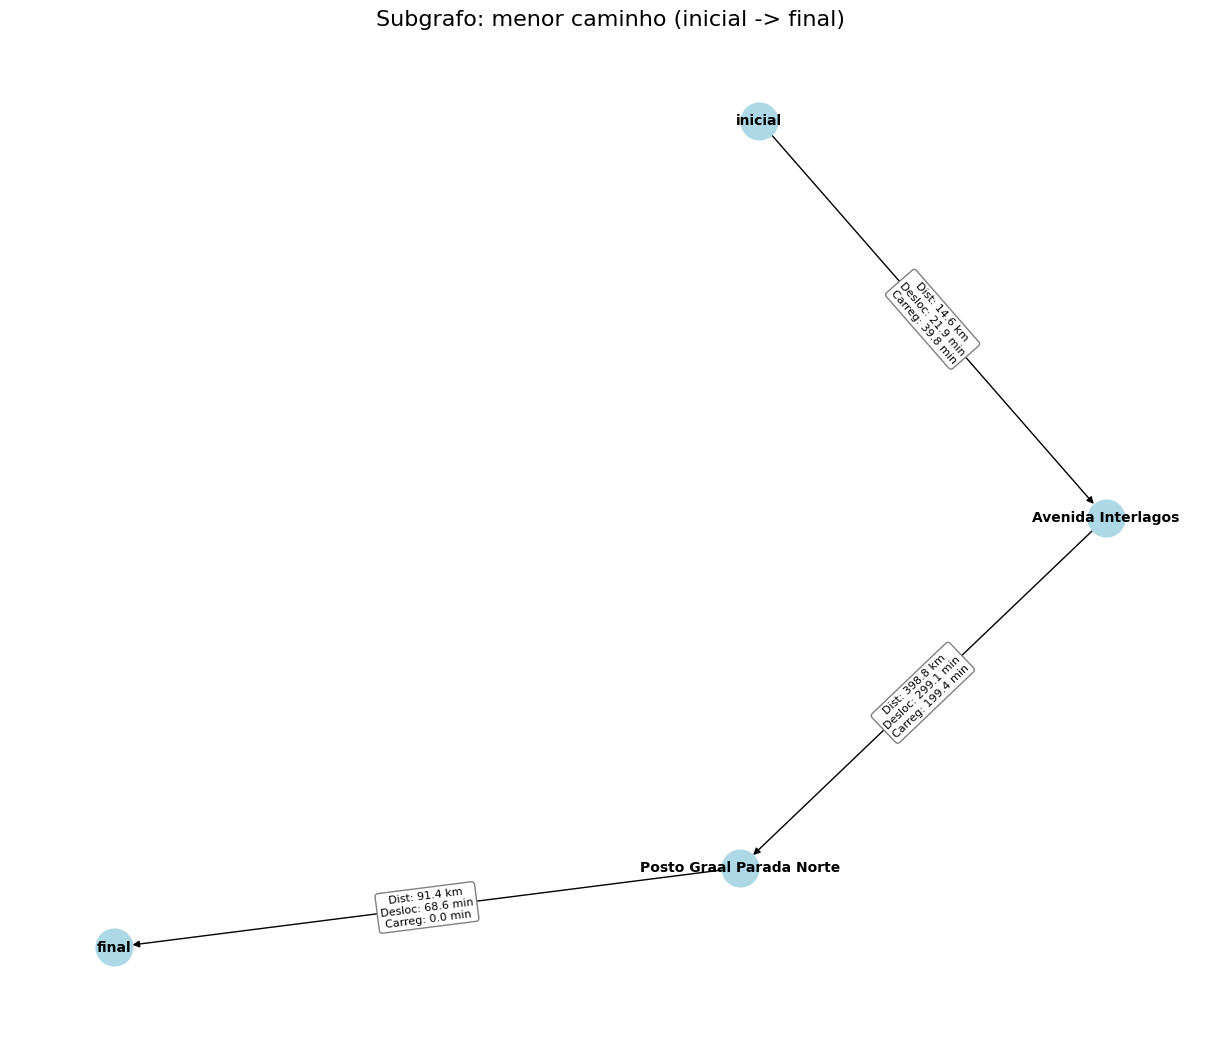

In [83]:
import matplotlib.pyplot as plt
import os
import networkx as nx

def plotar_grafo(grafo, titulo, caminho_arquivo=None):
    """
    Plota o grafo utilizando NetworkX e Matplotlib, mostrando as informações de distância,
    tempo de deslocamento e tempo de carregamento nas arestas.

    Args:
        grafo (networkx.Graph): O grafo a ser plotado.
        titulo (str): O título do gráfico.
        caminho_arquivo (str, opcional): Caminho para salvar a imagem do grafo. Se None, apenas exibe o gráfico.
    """
    pos = nx.spring_layout(grafo)  # Calcula as posições dos nós
    plt.figure(figsize=(12, 10))

    # Desenhar nós e arestas
    nx.draw(
        grafo, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=10, font_weight="bold"
    )

    # Preparar rótulos das arestas com as três informações
    edge_labels = {
        (u, v): (
            f"Dist: {data.get('weight_distancia', 0):.1f} km\n"
            f"Desloc: {data.get('weight_deslocamento', 0):.1f} min\n"
            f"Carreg: {data.get('weight_carregamento', 0):.1f} min"
        )
        for u, v, data in grafo.edges(data=True)
    }

    # Desenhar os rótulos das arestas
    nx.draw_networkx_edge_labels(
        grafo, pos, edge_labels=edge_labels, font_size=8,
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white")
    )

    # Adicionar título
    plt.title(titulo, fontsize=16)

    # Salvar ou exibir
    if caminho_arquivo:
        plt.savefig(caminho_arquivo, format="png", dpi=300)
        print(f"Grafo salvo como imagem em {caminho_arquivo}.")
    else:
        plt.show()


# Exemplo de uso com subgrafo do menor caminho
if __name__ == "__main__":
    # Configurações de entrada
    pasta = "400km"  # Pasta onde o grafo JSON está salvo
    nome_arquivo = f"{pasta}/grafo_400_km.json"  # Caminho do arquivo do grafo
    ponto_inicial = 'inicial'
    ponto_final = 'final'

    # Carregar o grafo completo do JSON
    G = carregar_grafo_de_json(nome_arquivo)

    # Verificar conexão
    conectado = verificar_conexao(G, ponto_inicial, ponto_final)
    print(f"Há conexão entre '{ponto_inicial}' e '{ponto_final}': {conectado}")

    if conectado:
        # Gerar subgrafo contendo apenas o menor caminho entre inicial e final
        subgrafo = gerar_subgrafo_menor_caminho(G, ponto_inicial, ponto_final)
        print(f"O subgrafo gerado possui {subgrafo.number_of_nodes()} nós e {subgrafo.number_of_edges()} arestas.")

        # Salvar subgrafo em JSON (opcional)
        caminho_subgrafo = f"{pasta}/subgrafo_menor_caminho.json"
        salvar_grafo_em_json(subgrafo, caminho_subgrafo)

        # Plotar o subgrafo
        plotar_grafo(
            subgrafo,
            "Subgrafo: menor caminho (inicial -> final)",
            caminho_arquivo=f"{pasta}/subgrafo_menor_caminho.png"
        )
    else:
        print("Não há conexão entre os pontos inicial e final.")

In [ ]:
import json
import networkx as nx
import heapq
import matplotlib.pyplot as plt
from networkx.readwrite import json_graph
from geopy.distance import geodesic

# ==============
# 1) Carregar grafo de JSON
# ==============
def carregar_grafo_de_json(caminho_arquivo):
    """Carrega o grafo de um arquivo JSON (node-link)."""
    with open(caminho_arquivo, 'r') as f:
        grafo_dados = json.load(f)
    return json_graph.node_link_graph(grafo_dados)

# ==============
# 2) A* e funções auxiliares
# ==============
def heuristica_padrao(G, node, goal, scenario, v_media=80, p_medio=50):
    """
    Calcula a heurística h(n) com base no cenário:
    - Cenário 1 (tempo de deslocamento): distância / v_media
    - Cenário 2 (tempo de carregamento): distância / p_medio * 60
    - Cenários híbridos: combinação ponderada
    """
    if 'Lat' in G.nodes[node] and 'Lat' in G.nodes[goal]:
        lat1 = G.nodes[node]['Lat']
        lon1 = G.nodes[node]['Lon']
        lat2 = G.nodes[goal]['Lat']
        lon2 = G.nodes[goal]['Lon']
        distancia = geodesic((lat1, lon1), (lat2, lon2)).km

        if scenario == 1:  # Tempo de deslocamento
            return distancia / v_media * 60
        elif scenario == 2:  # Tempo de carregamento
            return distancia / p_medio * 60
        elif scenario in [4, 5, 6]:  # Híbrido deslocamento e carregamento
            return 0.5 * (distancia / v_media * 60) + 0.5 * (distancia / p_medio * 60)
        elif scenario in [7, 8, 9]:  # Híbrido com pesos diferentes
            return 0.4 * (distancia / v_media * 60) + 0.4 * (distancia / p_medio * 60) + 0.2 * distancia
        else:  # Cenários baseados apenas em distância
            return distancia
    return 0.0  # Caso os dados sejam inválidos

def custo_aresta(G, u, v, scenario):
    """
    Retorna o custo da aresta (u->v) conforme o cenário escolhido.
    """
    data = G[u][v]
    dist = data["weight_distancia"]
    t_desloc = data["weight_deslocamento"]
    t_carr = data["weight_carregamento"]

    if scenario == 1:
        # Apenas tempo de deslocamento
        return t_desloc
    elif scenario == 2:
        # Apenas tempo de carregamento
        return t_carr
    elif scenario == 3:
        # Apenas distância
        return dist
    elif scenario == 4:
        # 0.5 * Tempo de deslocamento + 0.5 * Tempo de carregamento
        return 0.5 * t_desloc + 0.5 * t_carr
    elif scenario == 5:
        # 0.5 * Tempo de deslocamento + 0.5 * Distância
        return 0.5 * t_desloc + 0.5 * dist
    elif scenario == 6:
        # 0.5 * Tempo de carregamento + 0.5 * Distância
        return 0.5 * t_carr + 0.5 * dist
    elif scenario == 7:
        # 0.4 * Tempo de deslocamento + 0.4 * Tempo de carregamento + 0.2 * Distância
        return 0.4 * t_desloc + 0.4 * t_carr + 0.2 * dist
    elif scenario == 8:
        # 0.4 * Tempo de deslocamento + 0.4 * Distância + 0.2 * Tempo de carregamento
        return 0.4 * t_desloc + 0.4 * dist + 0.2 * t_carr
    elif scenario == 9:
        # 0.4 * Tempo de carregamento + 0.4 * Distância + 0.2 * Tempo de deslocamento
        return 0.4 * t_carr + 0.4 * dist + 0.2 * t_desloc

    return dist  # fallback (caso inválido)

def a_star(G, start, goal, scenario=1):
    """
    Execução do A* no grafo G, partindo de 'start' até 'goal',
    usando a função custo_aresta para g(n), e heuristica_padrao para h(n).
    """
    open_heap = []
    heapq.heappush(open_heap, (0, start))
    came_from = {}
    g_score = {n: float('inf') for n in G.nodes}
    f_score = {n: float('inf') for n in G.nodes}

    g_score[start] = 0
    f_score[start] = heuristica_padrao(G, start, goal, scenario)

    in_open_set = set([start])

    while open_heap:
        _, current = heapq.heappop(open_heap)
        in_open_set.remove(current)

        if current == goal:
            return reconstruir_caminho(came_from, current), g_score[current]

        for neighbor in G.successors(current):
            tentative_g = g_score[current] + custo_aresta(G, current, neighbor, scenario)
            if tentative_g < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                f_score[neighbor] = tentative_g + heuristica_padrao(G, neighbor, goal, scenario)
                if neighbor not in in_open_set:
                    heapq.heappush(open_heap, (f_score[neighbor], neighbor))
                    in_open_set.add(neighbor)
    return None, float('inf')

def reconstruir_caminho(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path

def calcular_estatisticas_do_c  aminho(G, path):
    """Soma distância total, tempo deslocamento e tempo de carregamento ao longo do path."""
    dist_total = 0.0
    desloc_total = 0.0
    carr_total = 0.0
    for i in range(len(path) - 1):
        u = path[i]
        v = path[i+1]
        data = G[u][v]
        dist_total += data["weight_distancia"]
        desloc_total += data["weight_deslocamento"]
        carr_total += data["weight_carregamento"]
    return dist_total, desloc_total, carr_total


# Carregando o grafo gerado na célula anterior (ajuste o caminho se necessário)
autonomia_km = 400
pasta = f"{autonomia_km}km"
caminho_arquivo = os.path.join(pasta, f'grafo_{autonomia_km}_km.json')
G_loaded = carregar_grafo_de_json(caminho_arquivo)

start_node = "inicial"
goal_node = "final"

# Dicionário de cenários e suas descrições
cenarios_desc = {
    1: "Apenas tempo de deslocamento",
    2: "Apenas tempo de carregamento",
    3: "Apenas distância",
    4: "0.5 * Tempo de deslocamento + 0.5 * Tempo de carregamento",
    5: "0.5 * Tempo de deslocamento + 0.5 * Distância",
    6: "0.5 * Tempo de carregamento + 0.5 * Distância",
    7: "0.4 * Tempo de deslocamento + 0.4 * Tempo de carregamento + 0.2 * Distância",
    8: "0.4 * Tempo de deslocamento + 0.4 * Distância + 0.2 * Tempo de carregamento",
    9: "0.4 * Tempo de carregamento + 0.4 * Distância + 0.2 * Tempo de deslocamento"
}


# Iterando pelos cenários
for c in range(1, 10):
    print(f"\n=== Cenário {c}: {cenarios_desc[c]} ===")
    path, custo = a_star(G_loaded, start_node, goal_node, scenario=c)
    if path is None:
        print("Nenhum caminho encontrado.")
    else:
        print("Caminho:", " -> ".join(path))
        dist, tdesloc, tcarr = calcular_estatisticas_do_caminho(G_loaded, path)
        print(f"Distância total:        {dist:.2f} km")
        print(f"Tempo de deslocamento:  {tdesloc:.2f} min")
        print(f"Tempo de carregamento:  {tcarr:.2f} min")
        print(f"Tempo total (min):      {(tdesloc + tcarr):.2f}")


=== Cenário 1: Apenas tempo de deslocamento ===
Caminho: inicial -> Posto Fase Quattro -> final
Distância total:        506.40 km
Tempo de deslocamento:  379.80 min
Tempo de carregamento:  1080.80 min
Tempo total (min):      1460.60

=== Cenário 2: Apenas tempo de carregamento ===
Caminho: inicial -> Plasticos Paraná -> final
Distância total:        599.50 km
Tempo de deslocamento:  449.60 min
Tempo de carregamento:  129.90 min
Tempo total (min):      579.50

=== Cenário 3: Apenas distância ===
Caminho: inicial -> Avenida Interlagos -> Posto Graal Parada Norte -> final
Distância total:        504.80 km
Tempo de deslocamento:  389.60 min
Tempo de carregamento:  239.20 min
Tempo total (min):      628.80

=== Cenário 4: 0.5 * Tempo de deslocamento + 0.5 * Tempo de carregamento ===
Caminho: inicial -> EDP | Graal Petropen (Plug&GO) -> final
Distância total:        510.60 km
Tempo de deslocamento:  383.00 min
Tempo de carregamento:  70.00 min
Tempo total (min):      453.00

=== Cenário 5: 

In [4]:
import json
import networkx as nx
import heapq
import matplotlib.pyplot as plt
from networkx.readwrite import json_graph
from geopy.distance import geodesic

# ==============
# 1) Carregar grafo de JSON
# ==============
def carregar_grafo_de_json(caminho_arquivo):
    """Carrega o grafo de um arquivo JSON (node-link)."""
    with open(caminho_arquivo, 'r') as f:
        grafo_dados = json.load(f)
    return json_graph.node_link_graph(grafo_dados)

# ==============
# 2) Funções auxiliares para Dijkstra
# ==============
def custo_aresta(G, u, v, scenario):
    """
    Retorna o custo da aresta (u->v) conforme o cenário escolhido.
    """
    data = G[u][v]
    dist = data["weight_distancia"]
    t_desloc = data["weight_deslocamento"]
    t_carr = data["weight_carregamento"]

    if scenario == 1:
        # Apenas tempo de deslocamento
        return t_desloc
    elif scenario == 2:
        # Apenas tempo de carregamento
        return t_carr
    elif scenario == 3:
        # Apenas distância
        return dist
    elif scenario == 4:
        # 0.5 * Tempo de deslocamento + 0.5 * Tempo de carregamento
        return 0.5 * t_desloc + 0.5 * t_carr
    elif scenario == 5:
        # 0.5 * Tempo de deslocamento + 0.5 * Distância
        return 0.5 * t_desloc + 0.5 * dist
    elif scenario == 6:
        # 0.5 * Tempo de carregamento + 0.5 * Distância
        return 0.5 * t_carr + 0.5 * dist
    elif scenario == 7:
        # 0.4 * Tempo de deslocamento + 0.4 * Tempo de carregamento + 0.2 * Distância
        return 0.4 * t_desloc + 0.4 * t_carr + 0.2 * dist
    elif scenario == 8:
        # 0.4 * Tempo de deslocamento + 0.4 * Distância + 0.2 * Tempo de carregamento
        return 0.4 * t_desloc + 0.4 * dist + 0.2 * t_carr
    elif scenario == 9:
        # 0.4 * Tempo de carregamento + 0.4 * Distância + 0.2 * Tempo de deslocamento
        return 0.4 * t_carr + 0.4 * dist + 0.2 * t_desloc

    return dist  # fallback (caso inválido)

def dijkstra(G, start, goal, scenario=1):
    """
    Execução do algoritmo de Dijkstra no grafo G, partindo de 'start' até 'goal',
    usando a função custo_aresta para calcular o custo das arestas.
    """
    # Usando uma fila de prioridade (heap)
    open_heap = []
    heapq.heappush(open_heap, (0, start))  # (custo acumulado, nó atual)
    came_from = {}
    g_score = {n: float('inf') for n in G.nodes}
    g_score[start] = 0

    while open_heap:
        current_cost, current = heapq.heappop(open_heap)

        if current == goal:
            return reconstruir_caminho(came_from, current), g_score[current]

        for neighbor in G.successors(current):
            tentative_g = g_score[current] + custo_aresta(G, current, neighbor, scenario)
            if tentative_g < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                heapq.heappush(open_heap, (tentative_g, neighbor))

    return None, float('inf')

def reconstruir_caminho(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path

def calcular_estatisticas_do_caminho(G, path):
    """Soma distância total, tempo deslocamento e tempo de carregamento ao longo do path."""
    dist_total = 0.0
    desloc_total = 0.0
    carr_total = 0.0
    for i in range(len(path) - 1):
        u = path[i]
        v = path[i+1]
        data = G[u][v]
        dist_total += data["weight_distancia"]
        desloc_total += data["weight_deslocamento"]
        carr_total += data["weight_carregamento"]
    return dist_total, desloc_total, carr_total

# Carregando o grafo gerado na célula anterior (ajuste o caminho se necessário)
autonomia_km = 400
pasta = f"{autonomia_km}km"
caminho_arquivo = os.path.join(pasta, f'grafo_{autonomia_km}_km.json')
G_loaded = carregar_grafo_de_json(caminho_arquivo)

start_node = "inicial"
goal_node = "final"

# Dicionário de cenários e suas descrições
cenarios_desc = {
    1: "Apenas tempo de deslocamento",
    2: "Apenas tempo de carregamento",
    3: "Apenas distância",
    4: "0.5 * Tempo de deslocamento + 0.5 * Tempo de carregamento",
    5: "0.5 * Tempo de deslocamento + 0.5 * Distância",
    6: "0.5 * Tempo de carregamento + 0.5 * Distância",
    7: "0.4 * Tempo de deslocamento + 0.4 * Tempo de carregamento + 0.2 * Distância",
    8: "0.4 * Tempo de deslocamento + 0.4 * Distância + 0.2 * Tempo de carregamento",
    9: "0.4 * Tempo de carregamento + 0.4 * Distância + 0.2 * Tempo de deslocamento"
}

# Iterando pelos cenários
for c in range(1, 10):
    print(f"\n=== Cenário {c}: {cenarios_desc[c]} ===")
    path, custo = dijkstra(G_loaded, start_node, goal_node, scenario=c)
    if path is None:
        print("Nenhum caminho encontrado.")
    else:
        print("Caminho:", " -> ".join(path))
        dist, tdesloc, tcarr = calcular_estatisticas_do_caminho(G_loaded, path)
        print(f"Distância total:        {dist:.2f} km")
        print(f"Tempo de deslocamento:  {tdesloc:.2f} min")
        print(f"Tempo de carregamento:  {tcarr:.2f} min")
        print(f"Tempo total (min):      {(tdesloc + tcarr):.2f}")


=== Cenário 1: Apenas tempo de deslocamento ===
Caminho: inicial -> Posto Fase Quattro -> final
Distância total:        506.40 km
Tempo de deslocamento:  379.80 min
Tempo de carregamento:  1080.80 min
Tempo total (min):      1460.60

=== Cenário 2: Apenas tempo de carregamento ===
Caminho: inicial -> Porsche Service | Body & Paint Stuttgart -> EDP | Graal Buenos Aires (Plug&GO) -> final
Distância total:        511.80 km
Tempo de deslocamento:  393.50 min
Tempo de carregamento:  63.20 min
Tempo total (min):      456.70

=== Cenário 3: Apenas distância ===
Caminho: inicial -> Avenida Interlagos -> Posto Graal Parada Norte -> final
Distância total:        504.80 km
Tempo de deslocamento:  389.60 min
Tempo de carregamento:  239.20 min
Tempo total (min):      628.80

=== Cenário 4: 0.5 * Tempo de deslocamento + 0.5 * Tempo de carregamento ===
Caminho: inicial -> EDP | Graal Buenos Aires (Plug&GO) -> final
Distância total:        511.70 km
Tempo de deslocamento:  383.80 min
Tempo de carrega


=== Cenário 1: Apenas tempo de deslocamento ===

=== Cenário 2: Apenas tempo de carregamento ===

=== Cenário 3: Apenas distância ===

=== Cenário 4: 0.5 * Tempo de deslocamento + 0.5 * Tempo de carregamento ===

=== Cenário 5: 0.5 * Tempo de deslocamento + 0.5 * Distância ===

=== Cenário 6: 0.5 * Tempo de carregamento + 0.5 * Distância ===

=== Cenário 7: 0.4 * Tempo de deslocamento + 0.4 * Tempo de carregamento + 0.2 * Distância ===

=== Cenário 8: 0.4 * Tempo de deslocamento + 0.4 * Distância + 0.2 * Tempo de carregamento ===

=== Cenário 9: 0.4 * Tempo de carregamento + 0.4 * Distância + 0.2 * Tempo de deslocamento ===


,Cenário,Descrição,Algoritmo,Caminho,Distância total,Tempo deslocamento,Tempo carregamento,Tempo total
0,1,Apenas tempo de deslocamento,A*,inicial -> Posto Fase Quattro -> final,506.4,379.8,1080.8,1460.6
1,1,Apenas tempo de deslocamento,Dijkstra,inicial -> Posto Fase Quattro -> final,506.4,379.8,1080.8,1460.6
2,2,Apenas tempo de carregamento,A*,inicial -> Plasticos Paraná -> final,599.5,449.6,129.9,579.5
3,2,Apenas tempo de carregamento,Dijkstra,inicial -> Porsche Service | Body & Paint Stut...,511.8,393.5,63.2,456.7
4,3,Apenas distância,A*,inicial -> Avenida Interlagos -> Posto Graal P...,504.8,389.6,239.2,628.8
5,3,Apenas distância,Dijkstra,inicial -> Avenida Interlagos -> Posto Graal P...,504.8,389.6,239.2,628.8
6,4,0.5 * Tempo de deslocamento + 0.5 * Tempo de c...,A*,inicial -> EDP | Graal Petropen (Plug&GO) -> f...,510.6,383.0,70.0,453.0
7,4,0.5 * Tempo de deslocamento + 0.5 * Tempo de c...,Dijkstra,inicial -> EDP | Graal Buenos Aires (Plug&GO) ...,511.7,383.8,66.0,449.8
8,5,0.5 * Tempo de deslocamento + 0.5 * Distância,A*,inicial -> Posto Sinuelo Sentido Sul -> final,511.0,383.2,468.4,851.6
9,5,0.5 * Tempo de deslocamento + 0.5 * Distância,Dijkstra,inicial -> Posto Fase Quattro -> final,506.4,379.8,1080.8,1460.6


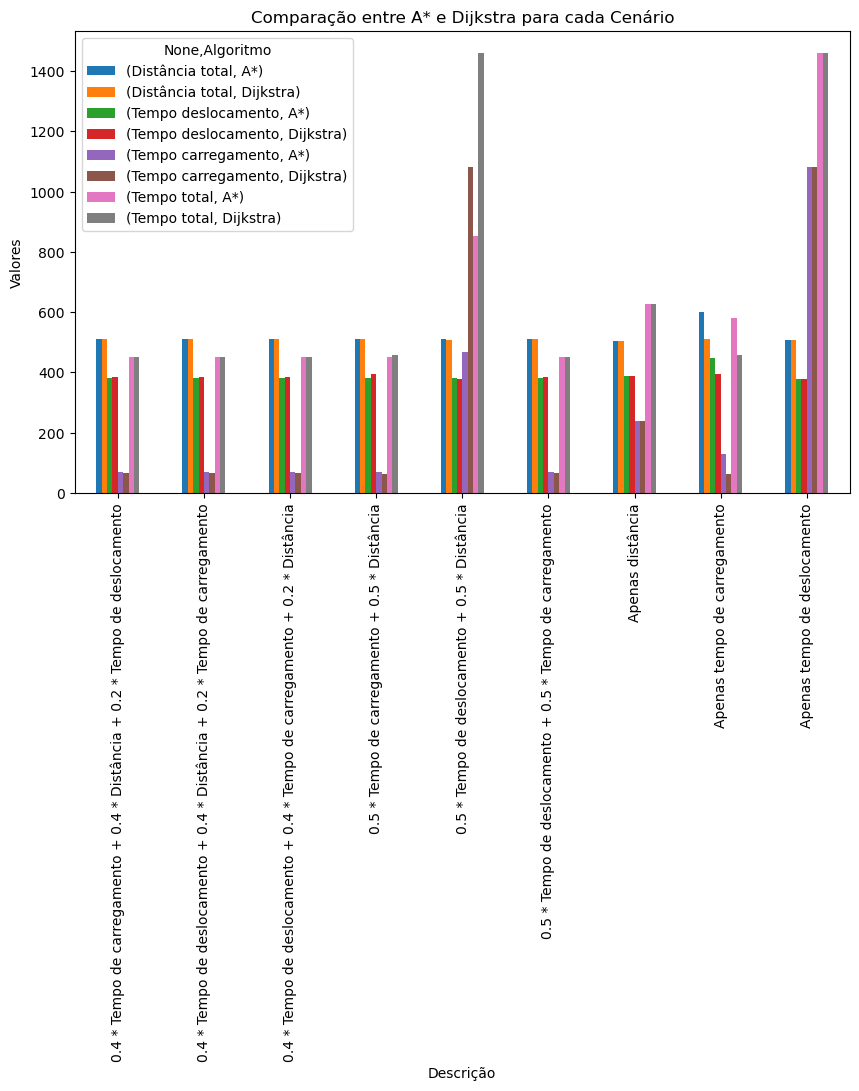

In [16]:
import json
import networkx as nx
import heapq
import matplotlib.pyplot as plt
from networkx.readwrite import json_graph
from geopy.distance import geodesic
import pandas as pd

# ==============
# 1) Carregar grafo de JSON
# ==============
def carregar_grafo_de_json(caminho_arquivo):
    """Carrega o grafo de um arquivo JSON (node-link)."""
    with open(caminho_arquivo, 'r') as f:
        grafo_dados = json.load(f)
    return json_graph.node_link_graph(grafo_dados)

# ==============
# 2) Funções auxiliares para A* e Dijkstra
# ==============

def custo_aresta(G, u, v, scenario):
    """
    Retorna o custo da aresta (u->v) conforme o cenário escolhido.
    """
    data = G[u][v]
    dist = data["weight_distancia"]
    t_desloc = data["weight_deslocamento"]
    t_carr = data["weight_carregamento"]

    if scenario == 1:
        return t_desloc
    elif scenario == 2:
        return t_carr
    elif scenario == 3:
        return dist
    elif scenario == 4:
        return 0.5 * t_desloc + 0.5 * t_carr
    elif scenario == 5:
        return 0.5 * t_desloc + 0.5 * dist
    elif scenario == 6:
        return 0.5 * t_carr + 0.5 * dist
    elif scenario == 7:
        return 0.4 * t_desloc + 0.4 * t_carr + 0.2 * dist
    elif scenario == 8:
        return 0.4 * t_desloc + 0.4 * dist + 0.2 * t_carr
    elif scenario == 9:
        return 0.4 * t_carr + 0.4 * dist + 0.2 * t_desloc

    return dist  # fallback (caso inválido)

def dijkstra(G, start, goal, scenario=1):
    """
    Execução do algoritmo de Dijkstra no grafo G, partindo de 'start' até 'goal',
    usando a função custo_aresta para calcular o custo das arestas.
    """
    open_heap = []
    heapq.heappush(open_heap, (0, start))  # (custo acumulado, nó atual)
    came_from = {}
    g_score = {n: float('inf') for n in G.nodes}
    g_score[start] = 0

    while open_heap:
        current_cost, current = heapq.heappop(open_heap)

        if current == goal:
            return reconstruir_caminho(came_from, current), g_score[current]

        for neighbor in G.successors(current):
            tentative_g = g_score[current] + custo_aresta(G, current, neighbor, scenario)
            if tentative_g < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                heapq.heappush(open_heap, (tentative_g, neighbor))

    return None, float('inf')

def heuristica_padrao(G, node, goal, scenario, v_media=80, p_medio=50):
    """
    Calcula a heurística h(n) com base no cenário:
    """
    if 'Lat' in G.nodes[node] and 'Lat' in G.nodes[goal]:
        lat1 = G.nodes[node]['Lat']
        lon1 = G.nodes[node]['Lon']
        lat2 = G.nodes[goal]['Lat']
        lon2 = G.nodes[goal]['Lon']
        distancia = geodesic((lat1, lon1), (lat2, lon2)).km

        if scenario == 1:  # Tempo de deslocamento
            return distancia / v_media * 60
        elif scenario == 2:  # Tempo de carregamento
            return distancia / p_medio * 60
        elif scenario in [4, 5, 6]:  # Híbrido deslocamento e carregamento
            return 0.5 * (distancia / v_media * 60) + 0.5 * (distancia / p_medio * 60)
        elif scenario in [7, 8, 9]:  # Híbrido com pesos diferentes
            return 0.4 * (distancia / v_media * 60) + 0.4 * (distancia / p_medio * 60) + 0.2 * distancia
        else:  # Cenários baseados apenas em distância
            return distancia
    return 0.0  # Caso os dados sejam inválidos

def a_star(G, start, goal, scenario=1):
    """
    Execução do A* no grafo G, partindo de 'start' até 'goal',
    usando a função custo_aresta para g(n), e heuristica_padrao para h(n).
    """
    open_heap = []
    heapq.heappush(open_heap, (0, start))
    came_from = {}
    g_score = {n: float('inf') for n in G.nodes}
    f_score = {n: float('inf') for n in G.nodes}

    g_score[start] = 0
    f_score[start] = heuristica_padrao(G, start, goal, scenario)

    in_open_set = set([start])

    while open_heap:
        _, current = heapq.heappop(open_heap)
        in_open_set.remove(current)

        if current == goal:
            return reconstruir_caminho(came_from, current), g_score[current]

        for neighbor in G.successors(current):
            tentative_g = g_score[current] + custo_aresta(G, current, neighbor, scenario)
            if tentative_g < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                f_score[neighbor] = tentative_g + heuristica_padrao(G, neighbor, goal, scenario)
                if neighbor not in in_open_set:
                    heapq.heappush(open_heap, (f_score[neighbor], neighbor))
                    in_open_set.add(neighbor)
    return None, float('inf')

def reconstruir_caminho(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path

def calcular_estatisticas_do_caminho(G, path):
    """Soma distância total, tempo deslocamento e tempo de carregamento ao longo do path."""
    dist_total = 0.0
    desloc_total = 0.0
    carr_total = 0.0
    for i in range(len(path) - 1):
        u = path[i]
        v = path[i+1]
        data = G[u][v]
        dist_total += data["weight_distancia"]
        desloc_total += data["weight_deslocamento"]
        carr_total += data["weight_carregamento"]
    return dist_total, desloc_total, carr_total

# Carregando o grafo gerado
autonomia_km = 400
pasta = f"{autonomia_km}km"
caminho_arquivo = os.path.join(pasta, f'grafo_{autonomia_km}_km.json')
G_loaded = carregar_grafo_de_json(caminho_arquivo)

start_node = "inicial"
goal_node = "final"

# Dicionário de cenários e suas descrições
cenarios_desc = {
    1: "Apenas tempo de deslocamento",
    2: "Apenas tempo de carregamento",
    3: "Apenas distância",
    4: "0.5 * Tempo de deslocamento + 0.5 * Tempo de carregamento",
    5: "0.5 * Tempo de deslocamento + 0.5 * Distância",
    6: "0.5 * Tempo de carregamento + 0.5 * Distância",
    7: "0.4 * Tempo de deslocamento + 0.4 * Tempo de carregamento + 0.2 * Distância",
    8: "0.4 * Tempo de deslocamento + 0.4 * Distância + 0.2 * Tempo de carregamento",
    9: "0.4 * Tempo de carregamento + 0.4 * Distância + 0.2 * Tempo de deslocamento"
}

# Criar uma lista para armazenar os resultados de A* e Dijkstra para cada cenário
resultados_comparacao = []

# Iterando pelos cenários
for c in range(1, 10):
    print(f"\n=== Cenário {c}: {cenarios_desc[c]} ===")
    
    # Rodar A*
    path_a_star, custo_a_star = a_star(G_loaded, start_node, goal_node, scenario=c)
    if path_a_star is None:
        resultados_comparacao.append({
            'Cenário': c,
            'Descrição': cenarios_desc[c],
            'Algoritmo': 'A*',
            'Caminho': "Nenhum caminho encontrado",
            'Distância total': None,
            'Tempo deslocamento': None,
            'Tempo carregamento': None,
            'Tempo total': None
        })
    else:
        dist_a_star, tdesloc_a_star, tcarr_a_star = calcular_estatisticas_do_caminho(G_loaded, path_a_star)
        resultados_comparacao.append({
            'Cenário': c,
            'Descrição': cenarios_desc[c],
            'Algoritmo': 'A*',
            'Caminho': " -> ".join(path_a_star),
            'Distância total': dist_a_star,
            'Tempo deslocamento': tdesloc_a_star,
            'Tempo carregamento': tcarr_a_star,
            'Tempo total': tdesloc_a_star + tcarr_a_star
        })
    
    # Rodar Dijkstra
    path_dijkstra, custo_dijkstra = dijkstra(G_loaded, start_node, goal_node, scenario=c)
    if path_dijkstra is None:
        resultados_comparacao.append({
            'Cenário': c,
            'Descrição': cenarios_desc[c],
            'Algoritmo': 'Dijkstra',
            'Caminho': "Nenhum caminho encontrado",
            'Distância total': None,
            'Tempo deslocamento': None,
            'Tempo carregamento': None,
            'Tempo total': None
        })
    else:
        dist_dijkstra, tdesloc_dijkstra, tcarr_dijkstra = calcular_estatisticas_do_caminho(G_loaded, path_dijkstra)
        resultados_comparacao.append({
            'Cenário': c,
            'Descrição': cenarios_desc[c],
            'Algoritmo': 'Dijkstra',
            'Caminho': " -> ".join(path_dijkstra),
            'Distância total': dist_dijkstra,
            'Tempo deslocamento': tdesloc_dijkstra,
            'Tempo carregamento': tcarr_dijkstra,
            'Tempo total': tdesloc_dijkstra + tcarr_dijkstra
        })

# Converter os resultados em um DataFrame para comparação
df_comparacao = pd.DataFrame(resultados_comparacao)

# Exibir a tabela de comparação
import pandas as pd
display(df_comparacao)

# Opcional: Plotar os resultados em um gráfico
df_comparacao.set_index(['Descrição', 'Algoritmo'])[['Distância total', 'Tempo deslocamento', 'Tempo carregamento', 'Tempo total']].unstack().plot(kind='bar', figsize=(10, 6))
plt.title('Comparação entre A* e Dijkstra para cada Cenário')
plt.ylabel('Valores')
plt.show()